In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Heart_Disease_Prediction.csv')  # Ganti path jika perlu
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
print("Info dataset:")
print(data.info())

print("\nCek nilai kosong:")
print(data.isnull().sum())


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1

In [ ]:
print("Jumlah data sebelum hapus duplikat:", data.shape)
data = data.drop_duplicates()
print("Jumlah data setelah hapus duplikat:", data.shape)


Jumlah data sebelum hapus duplikat: (270, 14)
Jumlah data setelah hapus duplikat: (270, 14)


In [ ]:
print(data.describe())
print("\nDistribusi label (Heart Disease):")
print(data['Heart Disease']. value_counts())


              Age         Sex  Chest pain type          BP  Cholesterol  \
count  270.000000  270.000000       270.000000  270.000000   270.000000   
mean    54.433333    0.677778         3.174074  131.344444   249.659259   
std      9.109067    0.468195         0.950090   17.861608    51.686237   
min     29.000000    0.000000         1.000000   94.000000   126.000000   
25%     48.000000    0.000000         3.000000  120.000000   213.000000   
50%     55.000000    1.000000         3.000000  130.000000   245.000000   
75%     61.000000    1.000000         4.000000  140.000000   280.000000   
max     77.000000    1.000000         4.000000  200.000000   564.000000   

       FBS over 120  EKG results      Max HR  Exercise angina  ST depression  \
count    270.000000   270.000000  270.000000       270.000000      270.00000   
mean       0.148148     1.022222  149.677778         0.329630        1.05000   
std        0.355906     0.997891   23.165717         0.470952        1.14521   
min 

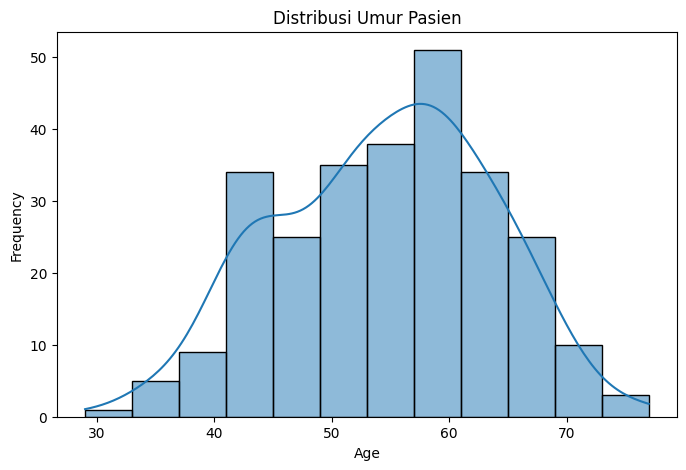

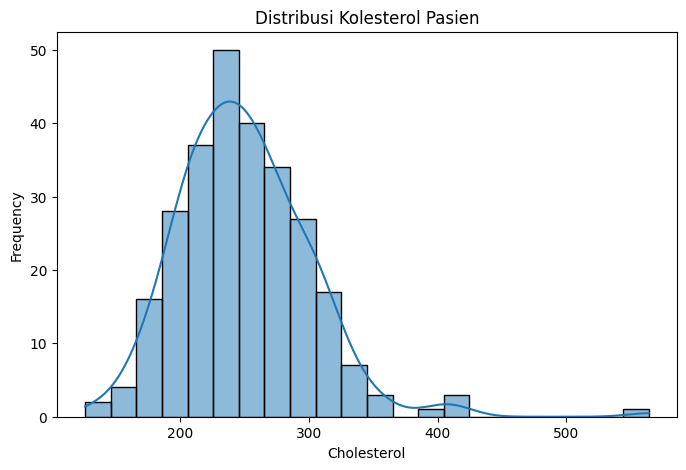

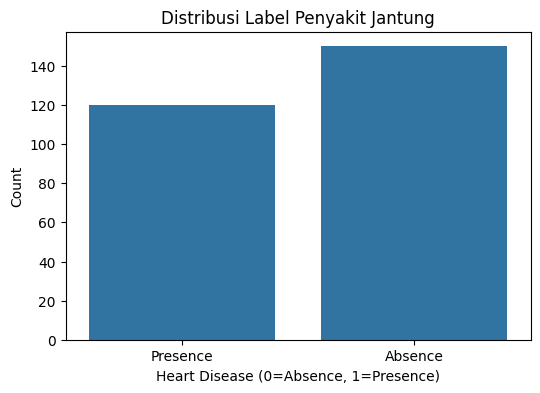

In [ ]:
# Import library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram distribusi umur
plt.figure(figsize=(8,5))
sns.histplot(data['Age'], kde=True)
plt.title('Distribusi Umur Pasien')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Histogram distribusi kolesterol
plt.figure(figsize=(8,5))
sns.histplot(data['Cholesterol'], kde=True)
plt.title('Distribusi Kolesterol Pasien')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

# Bar chart distribusi label
plt.figure(figsize=(6,4))
sns.countplot(x='Heart Disease', data=data)
plt.title('Distribusi Label Penyakit Jantung')
plt.xlabel('Heart Disease (0=Absence, 1=Presence)')
plt.ylabel('Count')
plt.show()

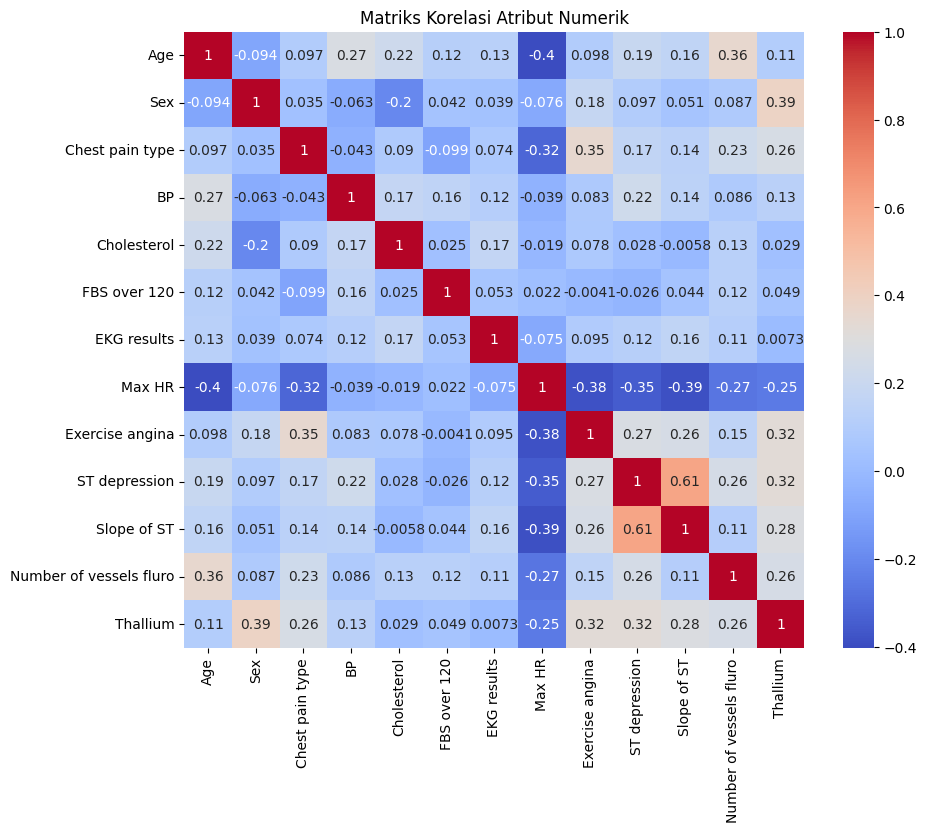

In [ ]:
# Ambil hanya kolom numerik
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Buat heatmap korelasi hanya untuk fitur numerik
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi Atribut Numerik")
plt.show()


In [ ]:
X = data.drop('Heart Disease', axis=1)
y = data['Heart Disease']


In [ ]:
X = pd.get_dummies(X)
X.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3


In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)


Ukuran data latih: (216, 13)
Ukuran data uji: (54, 13)


In [ ]:
print(type(y_test))
print(y_test[:10])


<class 'pandas.core.series.Series'>
195     Absence
132     Absence
162     Absence
129    Presence
66      Absence
254     Absence
38      Absence
65     Presence
97     Presence
61     Presence
Name: Heart Disease, dtype: object


In [ ]:
import numpy as np

unique_train, counts_train = np.unique(y_train, return_counts=True)
print("Distribusi y_train:", dict(zip(unique_train, counts_train)))

Distribusi y_train: {'Absence': np.int64(120), 'Presence': np.int64(96)}


In [ ]:
import numpy as np

unique_test, counts_test = np.unique(y_test, return_counts=True)
print("Distribusi y_test:", dict(zip(unique_test, counts_test)))


Distribusi y_test: {'Absence': np.int64(30), 'Presence': np.int64(24)}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)


<ipython-input-100-7ed35d4f04cc>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace({'Absence': 0, 'Presence': 1})


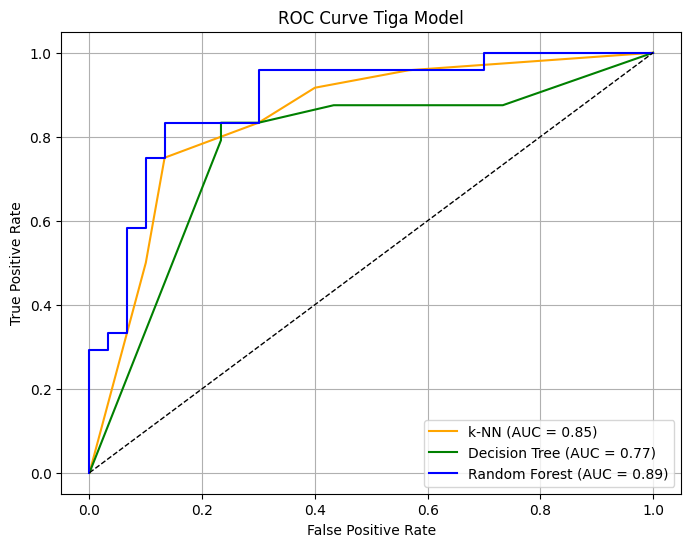

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Ubah label 'Absence' dan 'Presence' jadi numerik (0 dan 1)
y_test = y_test.replace({'Absence': 0, 'Presence': 1})
y_pred_knn = np.where(y_pred_knn == 'Presence', 1, 0)
y_pred_dt = np.where(y_pred_dt == 'Presence', 1, 0)
y_pred_rf = np.where(y_pred_rf == 'Presence', 1, 0)

# ROC untuk k-NN
fpr_knn, tpr_knn, _ = roc_curve(y_test, model_knn.predict_proba(X_test)[:,1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

# ROC untuk Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, model_dt.predict_proba(X_test)[:,1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

# ROC untuk Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, model_rf.predict_proba(X_test)[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr_knn, tpr_knn, label='k-NN (AUC = %0.2f)' % roc_auc_knn, color='orange')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt, color='green')
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_rf, color='blue')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Tiga Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

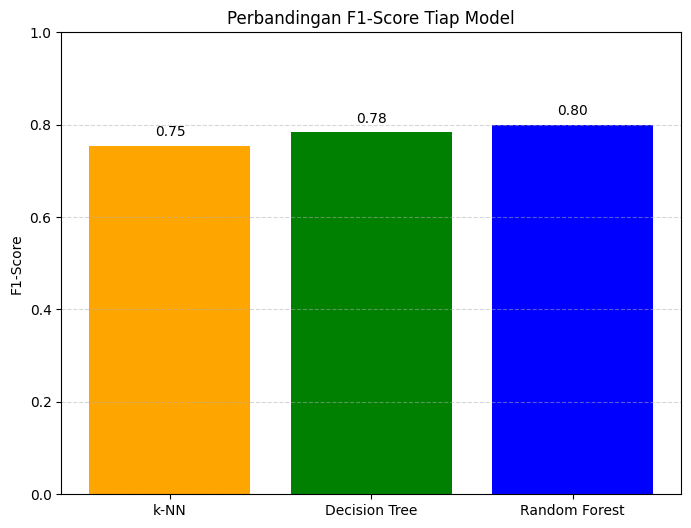

In [ ]:
# Pastikan f1-score sudah dihitung
f1_knn = f1_score(y_test, y_pred_knn)
f1_dt = f1_score(y_test, y_pred_dt)
f1_rf = f1_score(y_test, y_pred_rf)

# Visualisasi F1-score
plt.figure(figsize=(8,6))
model_names = ['k-NN', 'Decision Tree', 'Random Forest']
f1_scores = [f1_knn, f1_dt, f1_rf]
bars = plt.bar(model_names, f1_scores, color=['orange', 'green', 'blue'])
plt.ylim(0, 1)
plt.title("Perbandingan F1-Score Tiap Model")
plt.ylabel("F1-Score")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Tampilkan nilai di atas bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.2f}", ha='center')

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Ubah label 'Absence' dan 'Presence' jadi numerik (0 dan 1)
y_test = y_test.replace({'Absence': 0, 'Presence': 1})
y_pred_knn = np.where(y_pred_knn == 'Presence', 1, 0)
y_pred_dt = np.where(y_pred_dt == 'Presence', 1, 0)
y_pred_rf = np.where(y_pred_rf == 'Presence', 1, 0)

# Evaluasi k-NN
print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("k-NN Precision:", precision_score(y_test, y_pred_knn))
print("k-NN Recall:", recall_score(y_test, y_pred_knn))
print("k-NN F1 Score:", f1_score(y_test, y_pred_knn))

# Decision Tree
print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Precision:", precision_score(y_test, y_pred_dt))
print("Decision Tree Recall:", recall_score(y_test, y_pred_dt))
print("Decision Tree F1 Score:", f1_score(y_test, y_pred_dt))

# Random Forest
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Precision:", precision_score(y_test, y_pred_rf))
print("Random Forest Recall:", recall_score(y_test, y_pred_rf))
print("Random Forest F1 Score:", f1_score(y_test, y_pred_rf))

# Evaluasi k-NN
print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("k-NN Precision:", precision_score(y_test, y_pred_knn))
print("k-NN Recall:", recall_score(y_test, y_pred_knn))
print("k-NN F1 Score:", f1_score(y_test, y_pred_knn))

# Lanjutkan untuk Decision Tree & Random Forest...

k-NN Accuracy: 0.5555555555555556
k-NN Precision: 0.0
k-NN Recall: 0.0
k-NN F1 Score: 0.0

Decision Tree Accuracy: 0.5555555555555556
Decision Tree Precision: 0.0
Decision Tree Recall: 0.0
Decision Tree F1 Score: 0.0

Random Forest Accuracy: 0.5555555555555556
Random Forest Precision: 0.0
Random Forest Recall: 0.0
Random Forest F1 Score: 0.0
k-NN Accuracy: 0.5555555555555556
k-NN Precision: 0.0
k-NN Recall: 0.0
k-NN F1 Score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=100,
    max_depth=5,
    min_samples_leaf=5,
    random_state=42
)

model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y_train)  # Pastikan pakai y_train yang asli (belum di-encode sebelumnya)


LabelEncoder()

In [ ]:
from sklearn.preprocessing import StandardScaler

# 1️⃣ Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 2️⃣ Training KNN pakai data yang sudah di-scale
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)  # Encode label jadi angka

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_scaled, y_train_encoded)

y_pred_knn_encoded = model_knn.predict(X_test_scaled)  # Ini angka
y_pred_knn_str = encoder.inverse_transform(y_pred_knn_encoded)  # Balik ke string

print(y_pred_knn_str)


['Absence' 'Absence' 'Absence' 'Presence' 'Absence' 'Absence' 'Absence'
 'Presence' 'Absence' 'Presence' 'Presence' 'Absence' 'Absence' 'Presence'
 'Presence' 'Presence' 'Absence' 'Presence' 'Absence' 'Presence' 'Absence'
 'Presence' 'Absence' 'Absence' 'Absence' 'Presence' 'Presence' 'Absence'
 'Absence' 'Presence' 'Absence' 'Presence' 'Presence' 'Absence' 'Absence'
 'Presence' 'Presence' 'Absence' 'Presence' 'Absence' 'Presence' 'Absence'
 'Presence' 'Presence' 'Presence' 'Absence' 'Absence' 'Presence'
 'Presence' 'Presence' 'Presence' 'Presence' 'Presence' 'Presence']


In [ ]:
import pandas as pd
import numpy as np

# Konversi prediksi string ke angka 0 dan 1
y_pred_knn = pd.Series(y_pred_knn).replace({'Absence': 0, 'Presence': 1}).to_numpy()
y_pred_dt = pd.Series(y_pred_dt).replace({'Absence': 0, 'Presence': 1}).to_numpy()
y_pred_rf = pd.Series(y_pred_rf).replace({'Absence': 0, 'Presence': 1}).to_numpy()

# Jika y_test belum dalam bentuk numerik
y_test = pd.Series(y_test).replace({'Absence': 0, 'Presence': 1}).to_numpy()
y_pred_knn = ['Presence', 'Absence', 'Absence', ...]

In [ ]:
y_pred_knn = pd.Series(y_pred_knn).replace({'Absence': 0, 'Presence': 1}).to_numpy()
y_pred_dt  = pd.Series(y_pred_dt).replace({'Absence': 0, 'Presence': 1}).to_numpy()
y_pred_rf  = pd.Series(y_pred_rf).replace({'Absence': 0, 'Presence': 1}).to_numpy()


In [ ]:
y_test = pd.Series(y_test).replace({'Absence': 0, 'Presence': 1}).to_numpy()


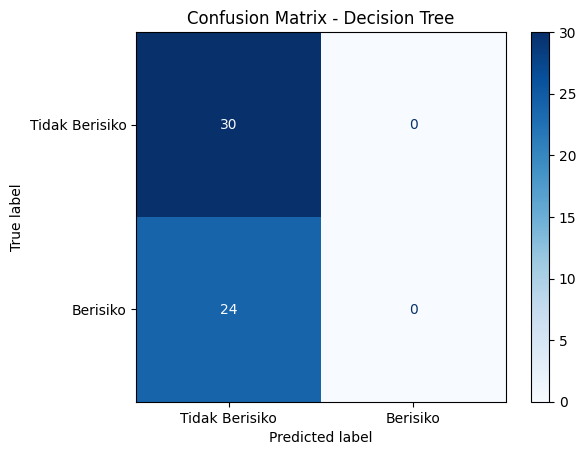

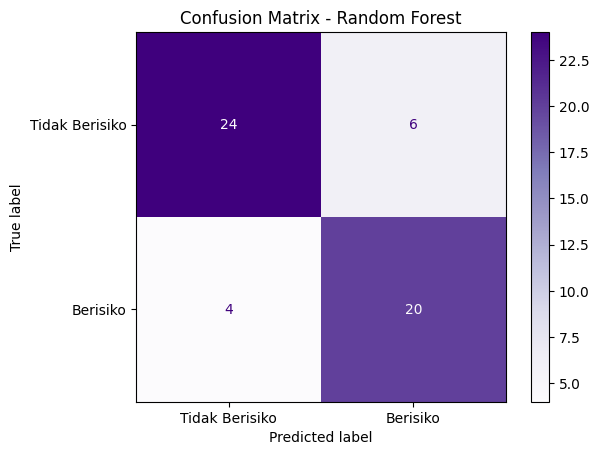

TypeError: '<' not supported between instances of 'ellipsis' and 'int'

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- Decision Tree ---
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=[0, 1])
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=["Tidak Berisiko", "Berisiko"])
disp_dt.plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# --- Random Forest ---
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=[0, 1])
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Tidak Berisiko", "Berisiko"])
disp_rf.plot(cmap='Purples')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# --- k-NN ---
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=[0, 1])
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=["Tidak Berisiko", "Berisiko"])
disp_knn.plot(cmap='Oranges')
plt.title("Confusion Matrix - k-NN")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def ensure_encoded(arr, encoder):
    if isinstance(arr, (list, np.ndarray)):
        sample = arr[0]
    else:
        sample = arr.iloc[0]
    if isinstance(sample, str):
        return encoder.transform(arr)
    return arr

# Pastikan semua y_test dan prediksi sudah encoded
y_test_enc = ensure_encoded(y_test, encoder)
y_pred_knn_enc = ensure_encoded(y_pred_knn, encoder)
y_pred_dt_enc = ensure_encoded(y_pred_dt, encoder)
y_pred_rf_enc = ensure_encoded(y_pred_rf, encoder)

# Hitung akurasi tiap model
akurasi = [
    accuracy_score(y_test_enc, y_pred_knn_enc),
    accuracy_score(y_test_enc, y_pred_dt_enc),
    accuracy_score(y_test_enc, y_pred_rf_enc)
]

model_names = ['k-NN', 'Decision Tree', 'Random Forest']

# Visualisasi
plt.figure(figsize=(8,6))
plt.bar(model_names, akurasi, color=['orange', 'green', 'blue'])
plt.ylim(0, 1)
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi Tiga Model")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


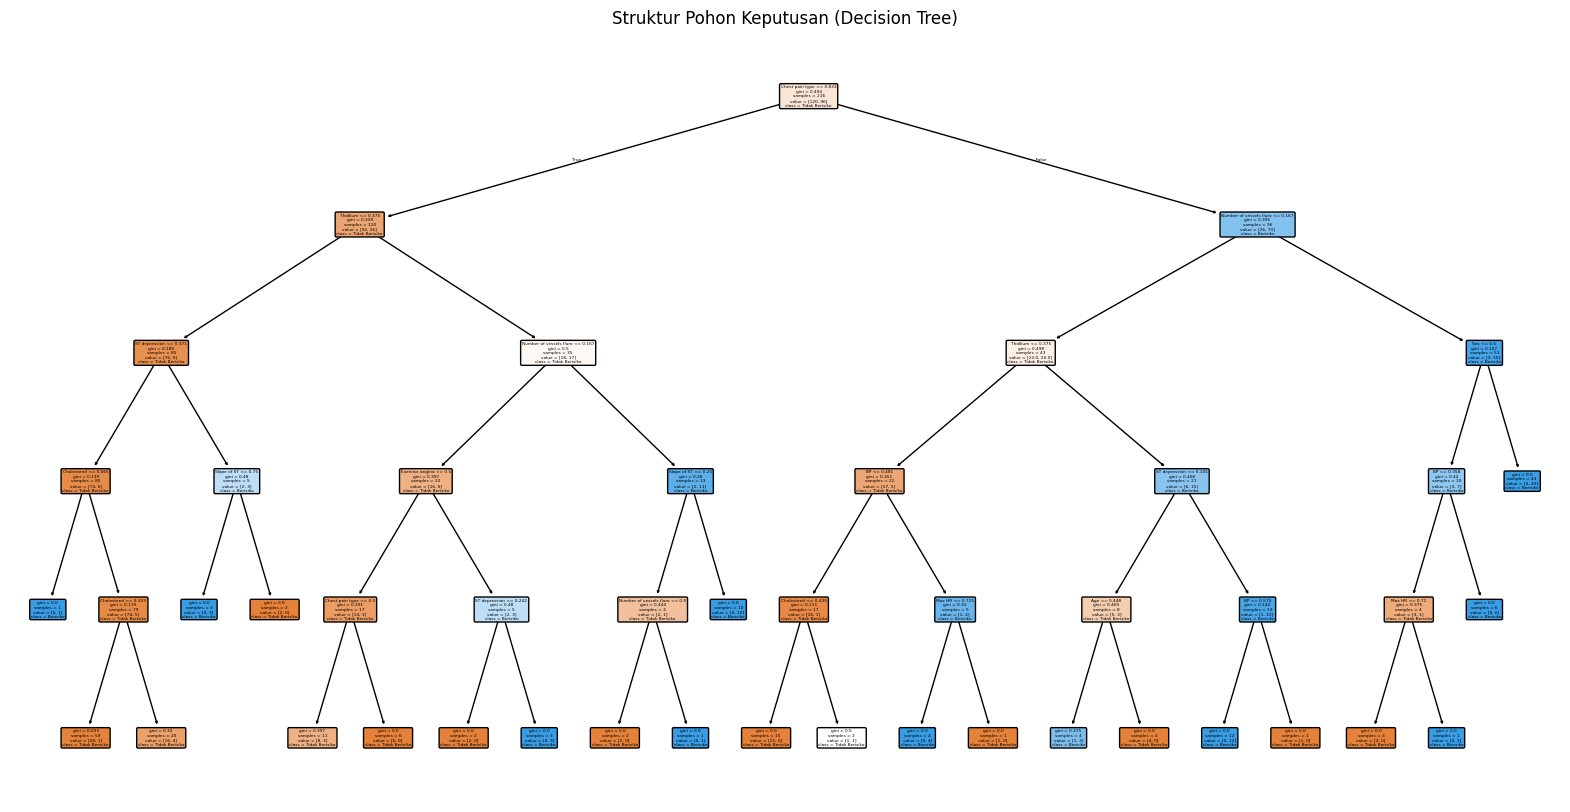

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model_dt,
          feature_names=X.columns,
          class_names=["Tidak Berisiko", "Berisiko"],
          filled=True,
          rounded=True)
plt.title("Struktur Pohon Keputusan (Decision Tree)")
plt.show()


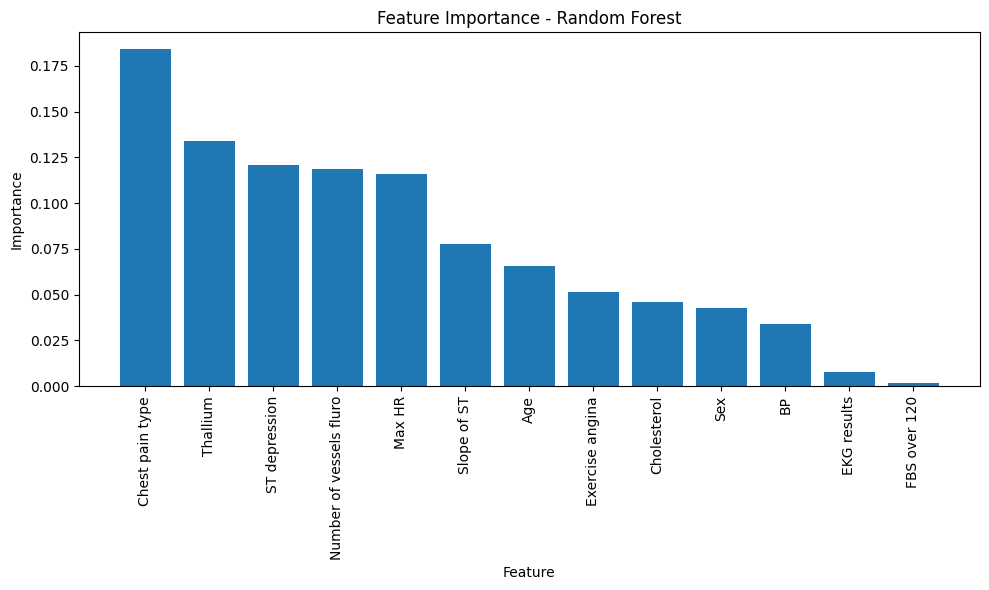

In [ ]:
# Visualisasi Feature Importance untuk Random Forest
importances = model_rf.feature_importances_
features = X.columns

# Urutkan feature importance dari terbesar ke terkecil
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()
